#### See the annualized returns vary by choosing different start dates

In [3]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [4]:
def getData():
    # Get the historical monthly returns from MSCI World
    df = pd.read_csv('~/data/retirement/benchmark/MSCI_world-v1.csv')
    df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))
    df.rename(columns={'Date': 'date', 'MSCI World': 'value'}, inplace=True)
    return df

In [5]:
def filterDate(startDT):
    # Filter by date, format yyyy-mm-01. Earliest is 1978-12-01
    return df[df['date'] >= startDt]

In [6]:
def getRate(df):
    # Return the average monthly growth rate
    initVal = df.iloc[0]['value']
    finalVal = df.iloc[-1]['value']
    numMonths = len(df)-1
    return 1+npf.rate(nper=numMonths, pmt=0, pv=-initVal, fv=finalVal)

In [7]:
def calcMetrics(df):
    # Compute the monthly growth rate of MSCI plus the std dev of monthly returns
    rate = getRate(df)
    # Compute the Standard Deviation of monthly returns
    df['prev'] = df['value'].shift(1)
    df['pctChg'] = (df['value']-df['prev'])/df['prev']
    std = df['pctChg'].std()
    return rate, std

##### Loop through different start dates and compute return

In [41]:
years = [str(x) for x in range(1979, 2019)]
dates = [x+'-01-01' for x in years]

In [42]:
print("MSCI return annualized")
df = getData()
l = []
for startDt in dates:
    df = filterDate(startDt)
    monthlyGrowthRate, std = calcMetrics(df)
    fv = npf.fv(monthlyGrowthRate-1, nper=12, pmt=0, pv=-100)
    annualRt = (fv-100)/100
    l.append(annualRt)
    print("{:<12}{:.1%}".format(startDt, annualRt))

MSCI return annualized
1979-01-01  10.9%
1980-01-01  11.0%
1981-01-01  10.5%
1982-01-01  10.3%
1983-01-01  9.9%
1984-01-01  9.1%
1985-01-01  8.7%
1986-01-01  8.7%
1987-01-01  8.3%
1988-01-01  8.7%
1989-01-01  7.9%
1990-01-01  8.1%
1991-01-01  9.1%
1992-01-01  8.8%
1993-01-01  9.0%
1994-01-01  8.0%
1995-01-01  8.8%
1996-01-01  8.3%
1997-01-01  7.9%
1998-01-01  7.0%
1999-01-01  6.6%
2000-01-01  5.5%
2001-01-01  5.8%
2002-01-01  6.9%
2003-01-01  9.8%
2004-01-01  9.1%
2005-01-01  9.3%
2006-01-01  8.4%
2007-01-01  8.3%
2008-01-01  10.0%
2009-01-01  14.0%
2010-01-01  13.0%
2011-01-01  12.2%
2012-01-01  13.4%
2013-01-01  13.4%
2014-01-01  12.9%
2015-01-01  10.9%
2016-01-01  13.0%
2017-01-01  11.8%
2018-01-01  12.4%


In [45]:
pd.Series(l).mean()

0.09642199901073804

<AxesSubplot:>

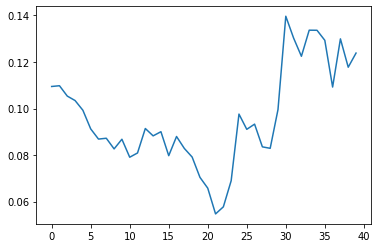

In [46]:
pd.Series(l).plot()

In [65]:
rt = 1+npf.rate(nper=12, pmt=0, pv=-100, fv=109)

In [66]:
np.power(rt, 12)

1.0900000000008885

In [67]:
fundVal = 100
for month in range(1,14):
    if month > 1:
        fundVal *= rt
    print("{:<5}{}".format(month, fundVal))

1    100
2    100.72073233162051
3    101.44665921417945
4    102.17781808648492
5    102.91424665717861
6    103.65598290668058
7    104.40306508914806
8    105.15553173444836
9    105.91342165014599
10   106.67677392350416
11   107.44562792350057
12   108.22002330285791
13   109.00000000008886


In [68]:
rt

1.007207323316205